In [75]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt


In [76]:
wine = pd.read_csv("winequality-red.csv")


In [77]:
wine['quality_label'] = pd.cut(wine['quality'], bins=[2, 5, 7, 9], labels=['low', 'medium', 'high'])


In [49]:
print(wine.shape)
print(wine.info())

(1599, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1599 non-null   float64 
 1   volatile acidity      1599 non-null   float64 
 2   citric acid           1599 non-null   float64 
 3   residual sugar        1599 non-null   float64 
 4   chlorides             1599 non-null   float64 
 5   free sulfur dioxide   1599 non-null   float64 
 6   total sulfur dioxide  1599 non-null   float64 
 7   density               1599 non-null   float64 
 8   pH                    1599 non-null   float64 
 9   sulphates             1599 non-null   float64 
 10  alcohol               1599 non-null   float64 
 11  quality               1599 non-null   int64   
 12  quality_label         1599 non-null   category
dtypes: category(1), float64(11), int64(1)
memory usage: 151.7 KB
None


In [50]:
print(wine.describe())


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [51]:
print(wine['quality_label'].value_counts())


medium    837
low       744
high       18
Name: quality_label, dtype: int64


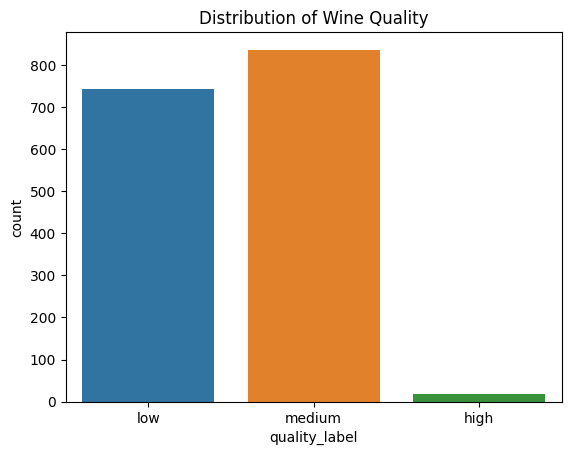

In [52]:
sns.countplot(x='quality_label', data=wine)
plt.title('Distribution of Wine Quality')
plt.show()


<ipython-input-53-06cdde3b646f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(wine.corr(), annot=True, cmap='RdBu')


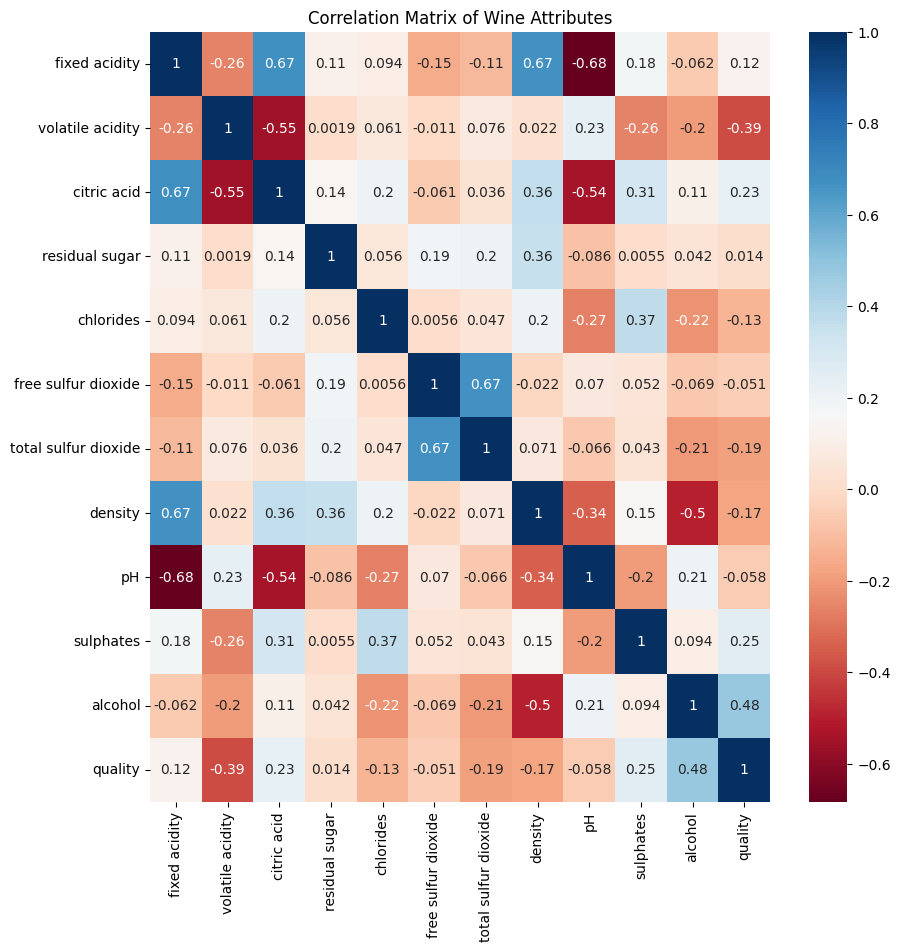

In [53]:
plt.figure(figsize=(10, 10))
sns.heatmap(wine.corr(), annot=True, cmap='RdBu')
plt.title('Correlation Matrix of Wine Attributes')
plt.show()

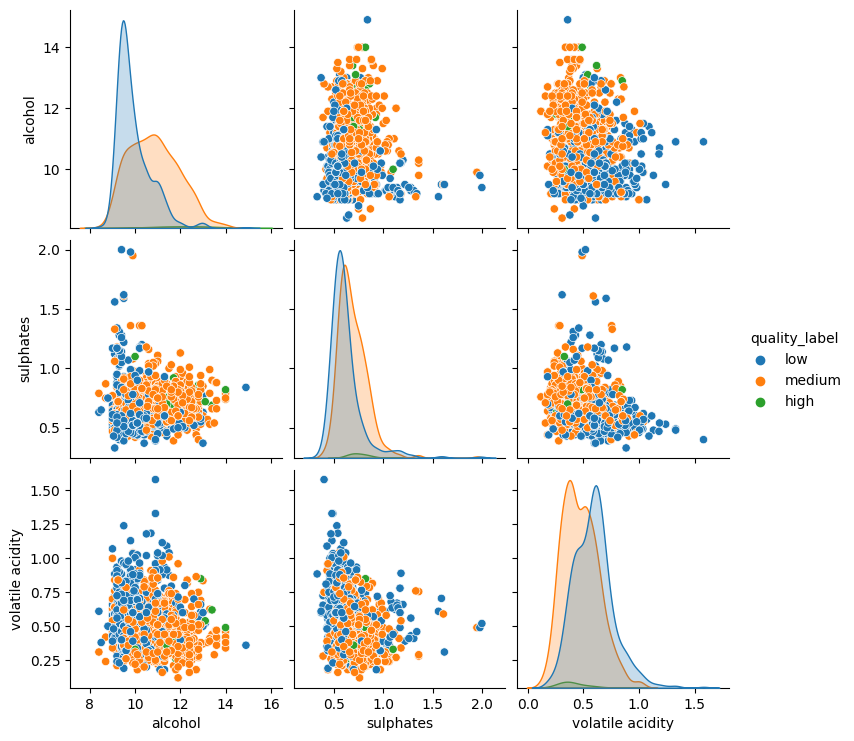

In [54]:
sns.pairplot(wine[['alcohol', 'sulphates', 'volatile acidity', 'quality_label']], hue='quality_label')
plt.show()

In [55]:
X = wine.drop(['quality', 'quality_label'], axis=1)
y = wine['quality_label']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [57]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_scaled = scaler.fit_transform(X)


In [58]:
# number of components we want to keep
n_components = 2


In [59]:
pca = PCA(n_components=n_components)

In [60]:
X_pca = pca.fit_transform(X_scaled)


In [61]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

Explained Variance Ratios: [0.28173931 0.1750827 ]


In [62]:
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])  # Adjust column names as needed


In [63]:
plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

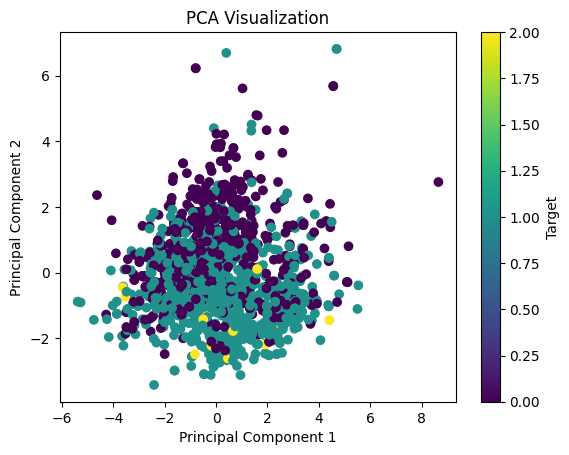

In [64]:
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=y.cat.codes, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.colorbar(label='Target')
plt.show()

In [65]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [66]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [67]:
rf_classifier = RandomForestClassifier(random_state=42)


In [68]:
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [69]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [70]:
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)
best_rf_classifier.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(min_samples_split=5, n_estimators=300, random_state=42)

In [71]:
y_pred = best_rf_classifier.predict(X_test)


In [72]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{classification_rep}")
print(f"Confusion Matrix:\n{confusion_mat}")


Accuracy: 0.7875
Classification Report:
              precision    recall  f1-score   support

        high       0.17      0.20      0.18         5
         low       0.78      0.80      0.79       141
      medium       0.81      0.79      0.80       174

    accuracy                           0.79       320
   macro avg       0.59      0.60      0.59       320
weighted avg       0.79      0.79      0.79       320

Confusion Matrix:
[[  1   0   4]
 [  0 113  28]
 [  5  31 138]]


In [78]:
sample = np.array([7.4, 0.7, 0.0, 1.9, 0.076,
                   11.0, 34.0, 0.9978,
                   3.51,
                   0.56,
                   9.4]).reshape(1,-1)
sample_pred = logreg.predict(sample)
print('The predicted quality label for this sample is:', sample_pred[0])